In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg
import os

In [5]:
plt.style.use('../../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [6]:
halo_smooth = np.linspace(11, 14, 100)

In [7]:
dfs = []

for file in os.listdir("../../data/fid/"):

    if file.endswith("h5"):

        ii = jsm_ancillary.load_sample("../../data/fid/" + file)
        print("loaded", file)

        df = pd.DataFrame({
            "log_Mhost": np.log10(ii.host_mass.values),
            "log_a50": np.log10(1 / (1 + ii.host_z50.values)),
            "log_Ncut": np.log10(ii.N_cut.values),
            "log_NRvircut": np.log10(ii.N_Rvircut.values),
            "log_Nartcut": np.log10(ii.N_artcut.values)})

        dfs.append(df)

test = pd.concat(dfs, ignore_index=True)

loaded 11.2_files.h5
loaded 11.8_files.h5
loaded 13.4_files.h5
loaded 12.6_files.h5
loaded 13.2_files.h5
loaded 12.0_files.h5
loaded 13.8_files.h5
loaded 11.4_files.h5
loaded 12.4_files.h5
loaded 14.0_files.h5
loaded 13.6_files.h5
loaded 11.0_files.h5
loaded 11.6_files.h5
loaded 12.2_files.h5
loaded 13.0_files.h5
loaded 12.8_files.h5


In [8]:
satgen_high_mass = test[test["log_Mhost"] > 12.5]
satgen_high_mass = satgen_high_mass.sort_values("log_Mhost")

median_a50 = []
median_Nsub = []
median_Nsub_Rvir = []
median_Nsub_art = []

delta_a50_sg_median = []
delta_Nsub_sg_median = []


for mass_bin in np.unique(satgen_high_mass["log_Mhost"]):
    subsample = satgen_high_mass["log_Mhost"] == mass_bin
    
    med_a50_i = np.median(satgen_high_mass["log_a50"][subsample])
    median_a50.append(med_a50_i)
    delta_a50_sg_median.extend(satgen_high_mass["log_a50"][subsample].values - med_a50_i)

    med_Nsub_i = np.median(satgen_high_mass["log_Ncut"][subsample])
    median_Nsub.append(med_Nsub_i)
    delta_Nsub_sg_median.extend(satgen_high_mass["log_Ncut"][subsample].values - med_Nsub_i)

    median_Nsub_Rvir.append(np.median(satgen_high_mass["log_NRvircut"][subsample]))
    median_Nsub_art.append(np.median(satgen_high_mass["log_Nartcut"][subsample]))

delta_a50_sg_median = np.array(delta_a50_sg_median)
delta_Nsub_sg_median = np.array(delta_Nsub_sg_median)

median_a50 = np.array(median_a50)
median_Nsub = np.array(median_Nsub)

In [ ]:
halo_smooth = np.linspace(12.5, 14, 100)

bolshoi_a50_smooth = np.array([-0.29353572, -0.29271854, -0.29190137, -0.29108419, -0.29026702,
       -0.28944984, -0.28863267, -0.28781549, -0.28699832, -0.28618114,
       -0.28536396, -0.28454679, -0.28372961, -0.28291244, -0.28209526,
       -0.28127809, -0.28046091, -0.27964374, -0.27882656, -0.27800939,
       -0.27719221, -0.27637504, -0.27555786, -0.27474068, -0.27392351,
       -0.27310633, -0.27228916, -0.27147198, -0.27065481, -0.26983763,
       -0.26902046, -0.26820328, -0.26738611, -0.26656893, -0.26575175,
       -0.26493458, -0.2641174 , -0.26330023, -0.26248305, -0.26166588,
       -0.2608487 , -0.26003153, -0.25921435, -0.25839718, -0.25758   ,
       -0.25676282, -0.25594565, -0.25512847, -0.2543113 , -0.25349412,
       -0.25267695, -0.25185977, -0.2510426 , -0.25022542, -0.24940825,
       -0.24859107, -0.24777389, -0.24695672, -0.24613954, -0.24532237,
       -0.24450519, -0.24368802, -0.24287084, -0.24205367, -0.24123649,
       -0.24041932, -0.23960214, -0.23878497, -0.23796779, -0.23715061,
       -0.23633344, -0.23551626, -0.23469909, -0.23388191, -0.23306474,
       -0.23224756, -0.23143039, -0.23061321, -0.22979604, -0.22897886,
       -0.22816168, -0.22734451, -0.22652733, -0.22571016, -0.22489298,
       -0.22407581, -0.22325863, -0.22244146, -0.22162428, -0.22080711,
       -0.21998993, -0.21917275, -0.21835558, -0.2175384 , -0.21672123,
       -0.21590405, -0.21508688, -0.2142697 , -0.21345253, -0.21263535])

bolshoi_Nsub_smooth = np.array([0.64666161, 0.66201631, 0.67737102, 0.69272573, 0.70808044,
       0.72343514, 0.73878985, 0.75414456, 0.76949927, 0.78485397,
       0.80020868, 0.81556339, 0.8309181 , 0.8462728 , 0.86162751,
       0.87698222, 0.89233693, 0.90769163, 0.92304634, 0.93840105,
       0.95375576, 0.96911046, 0.98446517, 0.99981988, 1.01517459,
       1.03052929, 1.045884  , 1.06123871, 1.07659342, 1.09194812,
       1.10730283, 1.12265754, 1.13801225, 1.15336695, 1.16872166,
       1.18407637, 1.19943108, 1.21478578, 1.23014049, 1.2454952 ,
       1.26084991, 1.27620461, 1.29155932, 1.30691403, 1.32226874,
       1.33762344, 1.35297815, 1.36833286, 1.38368757, 1.39904227,
       1.41439698, 1.42975169, 1.4451064 , 1.4604611 , 1.47581581,
       1.49117052, 1.50652523, 1.52187993, 1.53723464, 1.55258935,
       1.56794406, 1.58329876, 1.59865347, 1.61400818, 1.62936289,
       1.64471759, 1.6600723 , 1.67542701, 1.69078172, 1.70613642,
       1.72149113, 1.73684584, 1.75220055, 1.76755525, 1.78290996,
       1.79826467, 1.81361938, 1.82897408, 1.84432879, 1.8596835 ,
       1.87503821, 1.89039291, 1.90574762, 1.92110233, 1.93645704,
       1.95181174, 1.96716645, 1.98252116, 1.99787587, 2.01323057,
       2.02858528, 2.04393999, 2.0592947 , 2.0746494 , 2.09000411,
       2.10535882, 2.12071353, 2.13606823, 2.15142294, 2.16677765])

In [10]:
a50_line(halo_smooth, 0.05, -0.97)

array([-0.345     , -0.34424242, -0.34348485, -0.34272727, -0.3419697 ,
       -0.34121212, -0.34045455, -0.33969697, -0.33893939, -0.33818182,
       -0.33742424, -0.33666667, -0.33590909, -0.33515152, -0.33439394,
       -0.33363636, -0.33287879, -0.33212121, -0.33136364, -0.33060606,
       -0.32984848, -0.32909091, -0.32833333, -0.32757576, -0.32681818,
       -0.32606061, -0.32530303, -0.32454545, -0.32378788, -0.3230303 ,
       -0.32227273, -0.32151515, -0.32075758, -0.32      , -0.31924242,
       -0.31848485, -0.31772727, -0.3169697 , -0.31621212, -0.31545455,
       -0.31469697, -0.31393939, -0.31318182, -0.31242424, -0.31166667,
       -0.31090909, -0.31015152, -0.30939394, -0.30863636, -0.30787879,
       -0.30712121, -0.30636364, -0.30560606, -0.30484848, -0.30409091,
       -0.30333333, -0.30257576, -0.30181818, -0.30106061, -0.30030303,
       -0.29954545, -0.29878788, -0.2980303 , -0.29727273, -0.29651515,
       -0.29575758, -0.295     , -0.29424242, -0.29348485, -0.29

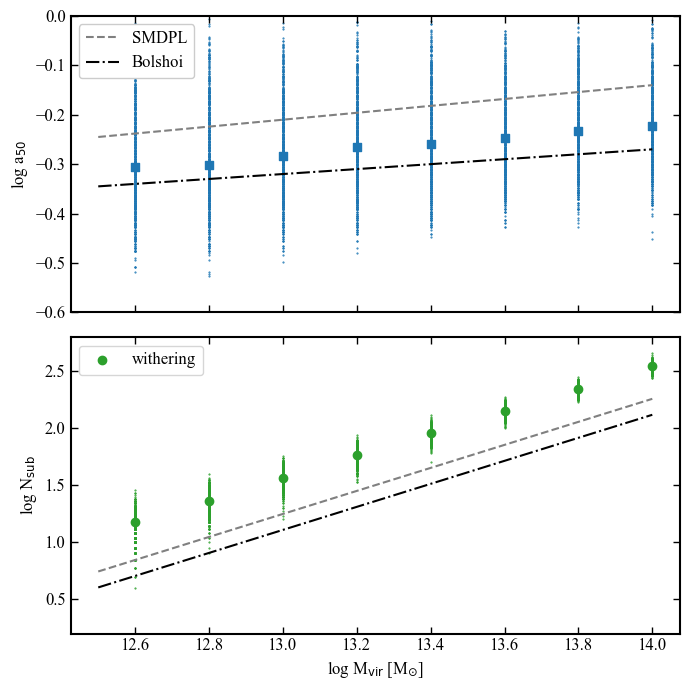

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(double_textwidth, double_textwidth), sharex=True)

ax[0].scatter(satgen_high_mass["log_Mhost"], satgen_high_mass["log_a50"], color="C0", marker=".", s=1)
ax[0].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_a50, color="C0", marker="s")

ax[0].plot(halo_smooth, a50_line(halo_smooth, 0.07, -1.12), label='SMDPL', ls="--", color="grey")
ax[0].plot(halo_smooth, a50_line(halo_smooth, 0.05, -0.97), label='Bolshoi', ls="-.", color="k")

ax[0].set_ylim(-0.6, 0)
ax[0].legend(loc=2, framealpha=1)

ax[1].scatter(satgen_high_mass["log_Mhost"], satgen_high_mass["log_Ncut"], color="C2", marker=".", s=1)
ax[1].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_Nsub, label="withering", color="C2")
# ax[1].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_Nsub_Rvir, label="within Rvir", marker="v", color="C1")
# ax[1].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_Nsub_art, label="with artificial disruption", marker="s", color="C0")

ax[1].plot(halo_smooth, Nsub_line(halo_smooth, 1.01, -11.88), ls="--", color="grey")
ax[1].plot(halo_smooth, Nsub_line(halo_smooth, 1.01, -12.02), ls="-.", color="k")
ax[1].legend()

ax[1].set_xlabel("log M$_{\\rm vir}$ [M$_{\\odot}$]")
ax[0].set_ylabel("log a$_{50}$")
ax[1].set_ylabel("log N$_{\\rm sub}$")
ax[1].set_ylim(0.2, 2.8)

plt.tight_layout()
plt.show()

In [9]:
SatGen_df = pd.DataFrame({"log_Mhost": satgen_high_mass["log_Mhost"], "a_50": satgen_high_mass["log_a50"], "delta_a50": delta_a50_sg_median, "Nsub": satgen_high_mass["log_Nartcut"], "delta_Nsub": delta_Nsub_sg_median})
SatGen_df.to_csv("../../../MassSpec/data/fid/summary.csv", index=False)

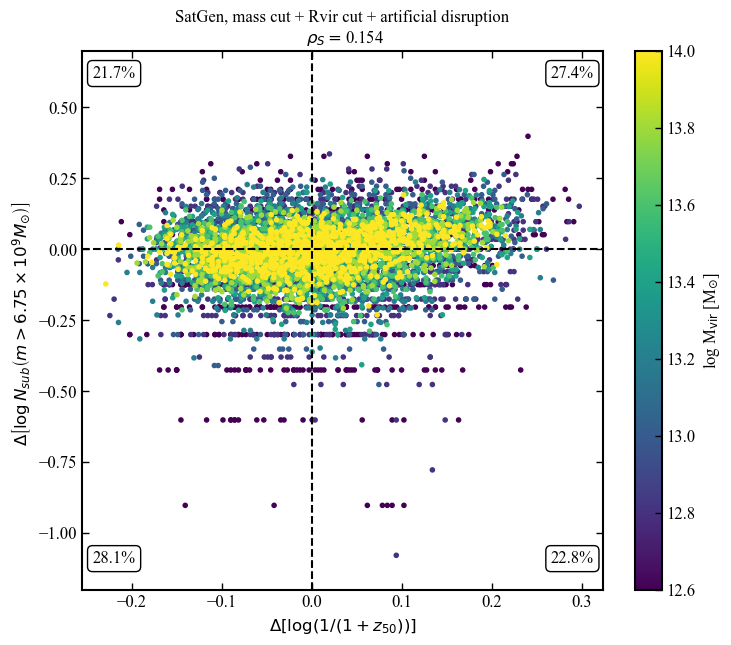

In [10]:
fig, ax = plt.subplots(figsize=(double_textwidth*1.2, double_textwidth))


ax.set_xlabel("$\\Delta [\\log (1/(1+z_{50}))] $")
ax.set_ylabel("$\\Delta \\left[\\log N_{sub} \\left(m > 6.75\\times10^{9} M_{\\odot} \\right) \\right]$  ")

ax.axhline(0, ls="--", color="k", zorder=11)
ax.axvline(0, ls="--", color="k", zorder=11)

qs, rho, pval = jsm_stats.quadrant_percentages_plot(delta_a50_sg_median, delta_Nsub_sg_median)
sm = ax.scatter(delta_a50_sg_median, delta_Nsub_sg_median, c=satgen_high_mass["log_Mhost"], marker=".")
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("log M$_{\\rm vir}$ [M$_{\\odot}$]")

ax.set_title("SatGen, mass cut + Rvir cut + artificial disruption\n $\\rho_S =$"+rho)
ax.text(0.9, 0.95, qs[0], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.9, 0.05, qs[1], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.02, 0.05, qs[2], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.02, 0.95, qs[3], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.set_ylim(-1.2, 0.7)


plt.show()